In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
df = pd.read_csv("../experiments/results/onenote_results/index_1/data_logger.csv")

In [15]:
sh10 = df["student_head_1_weight_0"].tolist()
sh11 = df["student_head_1_weight_1"].tolist()

sh00 = df["student_head_0_weight_0"].tolist()
sh01 = df["student_head_0_weight_1"].tolist()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


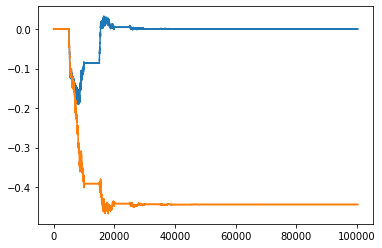

In [19]:
fig = plt.figure()
plt.plot(range(len(sh10)), sh10)
plt.plot(range(len(sh11)), sh11)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


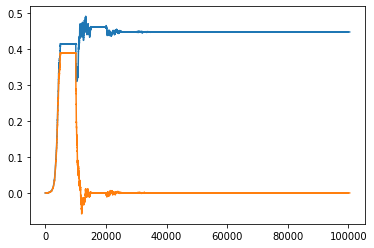

In [20]:
fig = plt.figure()
plt.plot(range(len(sh00)), sh00)
plt.plot(range(len(sh01)), sh01)
fig.show()

In [22]:
df = pd.read_csv("../experiments/results/onenote_results/index_1/data_logger.csv")
df2 = pd.read_csv("../experiments/results/onenote_results/index_3/data_logger.csv")

In [26]:
ge1 = df["teacher_0_generalisation_error/log"].tolist()
ge2 = df2["teacher_1_generalisation_error/log"].tolist()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


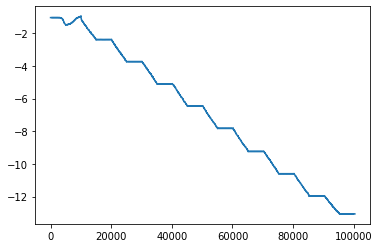

In [27]:
fig = plt.figure()
plt.plot(range(len(ge1)), ge1)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


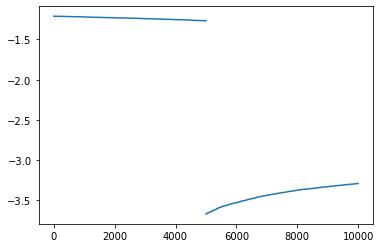

In [33]:
fig = plt.figure()
plt.plot(range(len(ge2[:10000])), ge2[:10000])
fig.show()

In [8]:
df4_files = [os.path.join("../experiments/results/onenote_results/index_4/", f) for f in os.listdir("../experiments/results/onenote_results/index_4/") if f.endswith("0.csv")]

In [10]:
ordered_df_paths = sorted(
            df4_files,
            key=lambda x: float(x.split("iter_")[-1].strip(".csv"))
            )

In [11]:
all_dfs = [pd.read_csv(df_path) for df_path in ordered_df_paths]  

In [ ]:
import time
dummy_csv_path = os.path.join("../experiments/results/onenote_results/index_4/", "dummy.csv")
all_dfs[0].to_csv(dummy_csv_path)
t0 = time.time()
for d in all_dfs:
    d.to_csv(dummy_csv_path, mode='a', header=False)
    print(time.time() - t0)
    t0 = time.time()

0.6481897830963135
0.6466929912567139
0.3971281051635742
0.3261678218841553
0.35930967330932617
0.3860909938812256
0.3522980213165283
0.32087087631225586
0.41318607330322266
0.4347398281097412
0.300457239151001
0.33052730560302734
0.4043920040130615
0.3666520118713379
0.391768217086792
0.4861481189727783
0.31972503662109375
0.3857910633087158
0.4105195999145508
0.38591790199279785
0.41827917098999023
0.315187931060791


In [54]:
merged_df = pd.concat(all_dfs)

In [55]:
len(merged_df)

52225443

In [56]:
ge4 = merged_df["teacher_1_generalisation_error/log"].tolist()

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


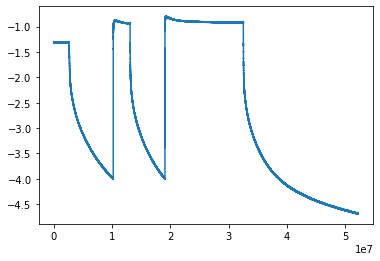

In [58]:
fig = plt.figure()
plt.plot(range(len(ge4)), ge4)
fig.show()

In [62]:
merged_df.to_hdf(os.path.join("../experiments/results/onenote_results/index_4/", "data_logger.h5"), key='merged_df', mode='w')

In [61]:
!pip3 install tables

    100% |████████████████████████████████| 4.3MB 2.6MB/s ta 0:00:011
    100% |████████████████████████████████| 194kB 8.7MB/s ta 0:00:01
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
m2 = pd.read_hdf(os.path.join("../experiments/results/onenote_results/index_4/", "data_logger.h5"))

In [ ]:
g2 = m2["teacher_1_generalisation_error/log"].tolist()
fig = plt.figure()
plt.plot(range(len(g2)), g2)
fig.show()